In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=500,n_features=2,centers = 5,random_state=6)

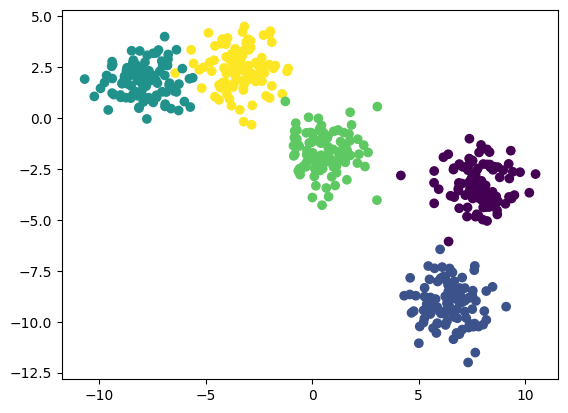

In [3]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [4]:
def initialize_cluster(k = 2,n_features = 2,min = -10,max = 10):
    clusters = []
    for i in range(k):
        cluster = {}
        cluster["center"] = (max-min)*np.random.rand(n_features) + min
        cluster['points'] = []
        clusters.append(cluster)
    return clusters

In [5]:
clusters = initialize_cluster(5)
clusters

[{'center': array([-5.40281491, -2.22693839]), 'points': []},
 {'center': array([ 9.60500698, -7.25029494]), 'points': []},
 {'center': array([ 8.945007  , -1.95816176]), 'points': []},
 {'center': array([3.17523939, 6.04239579]), 'points': []},
 {'center': array([7.585559  , 3.90530612]), 'points': []}]

In [6]:
def distance(p1,p2):
    return np.sqrt(np.sum((p2-p1)**2))

In [7]:
def assign_points(X,clusters):
    for i in range(len(X)):
        distances = []
        for cluster in clusters:
            distances.append(distance(cluster['center'],X[i]))
        clusters[np.argmin(distances)]['points'].append(X[i])
    

In [9]:
def plot_clusters(clusters):
    for cluster in clusters:
        if len(cluster['points']) != 0:
            p = np.array(cluster['points'])
            plt.scatter(p[:,0],p[:,1])
        c = cluster['center']
        plt.scatter(c[0],c[1],c = 'black')
    plt.show()

In [8]:
def update_clusters(clusters):
    is_updated = False
    for cluster in clusters:
        if len(cluster['points']) != 0:
            new_center = np.mean(cluster['points'],axis = 0)
            if np.any(new_center != cluster['center']):
                is_updated = True
                cluster['center'] = new_center
            
            cluster['points'] = []
    return is_updated

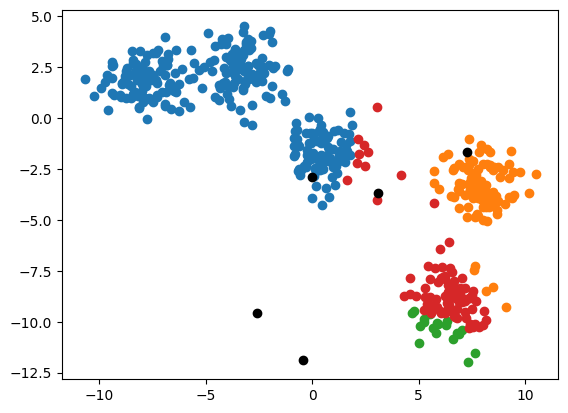

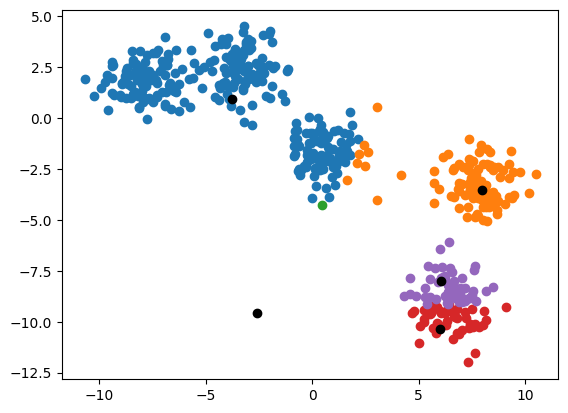

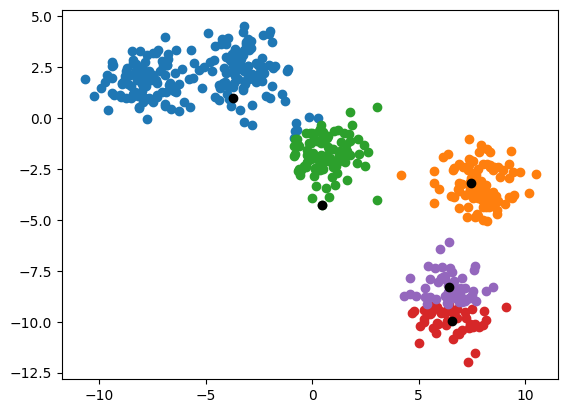

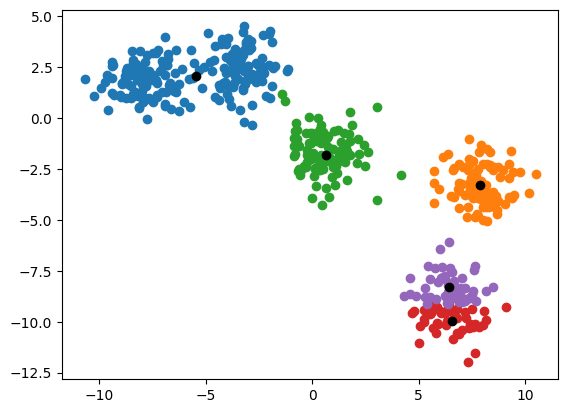

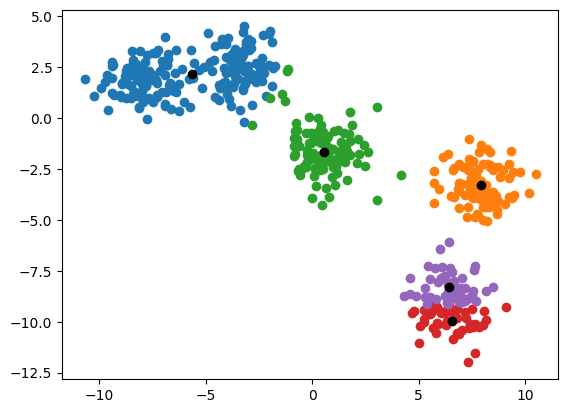

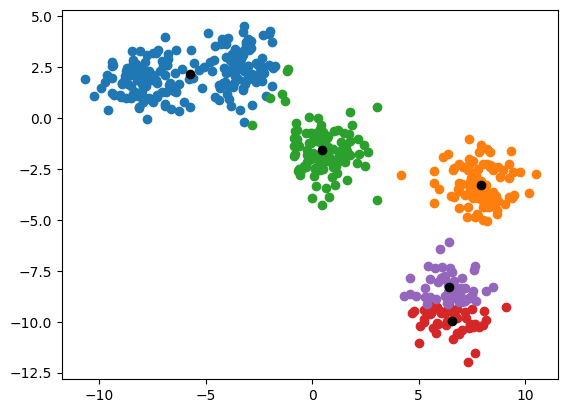

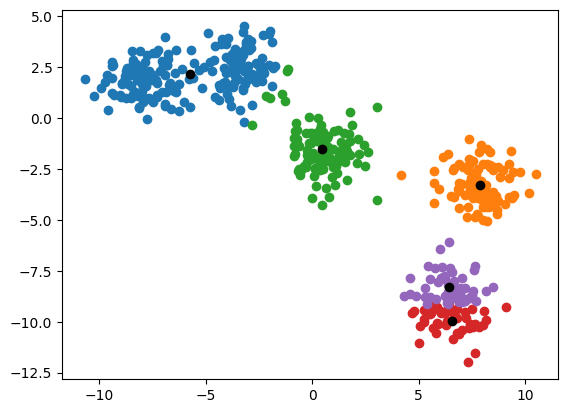

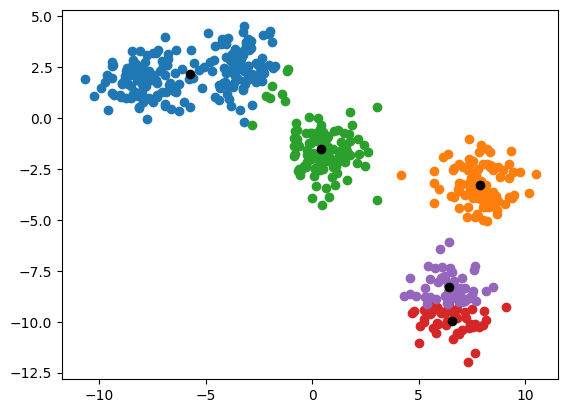

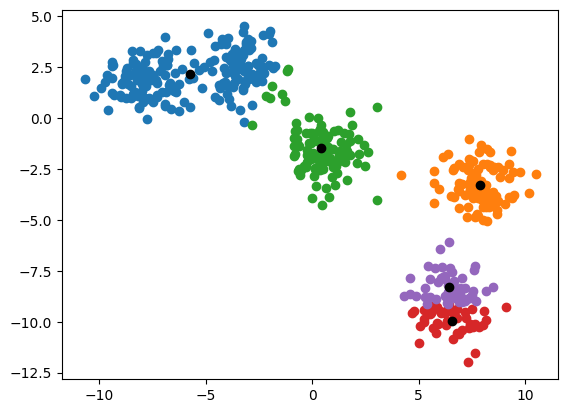

In [11]:
clusters = initialize_cluster(k = 5,n_features=2,min = np.min(X,axis = 0),max = np.max(X,axis = 0))
for i in range(10):
    assign_points(X,clusters)
    plot_clusters(clusters)
    is_updated = update_clusters(clusters)
    if is_updated == False:
        break

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
clf = KMeans(n_clusters=5)

In [21]:
clf.fit(X)

KMeans(n_clusters=5)

In [22]:
clf.inertia_

918.0015874686628

In [23]:
clf.cluster_centers_

array([[ 0.57954348, -1.71991435],
       [ 6.49057282, -9.07595071],
       [-7.82716442,  1.82865429],
       [-3.32447703,  2.43900288],
       [ 7.88155243, -3.28786469]])

In [41]:
# clf.predict(X)

In [17]:
sil = []
wcss = []
for i in range(2,10):
    clf = KMeans(n_clusters=i)
    clf.fit(X)
    wcss.append(clf.inertia_)
    sil.append(silhouette_score(X,clf.predict(X)))

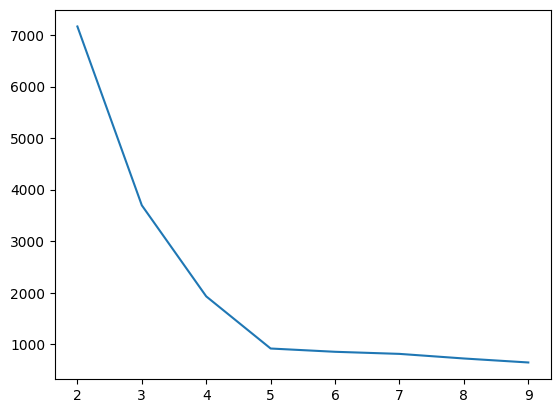

In [18]:
plt.plot([i for i in range(2,10)],wcss)

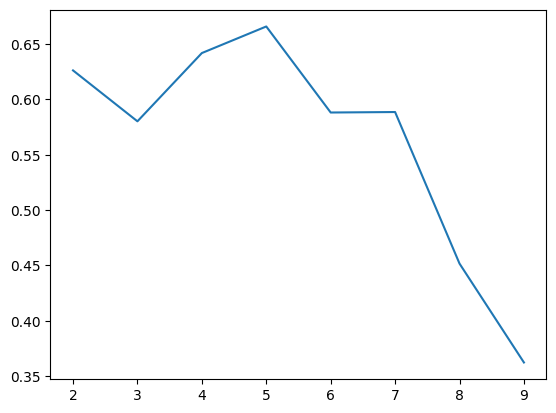

In [19]:
plt.plot([i for i in range(2,10)],sil)

In [ ]:
clf